In [14]:
# API integration of CoinMarketCap

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '945d2d77c050442e8faa5412b6e4e92a',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  # print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [10]:
import pandas as pd

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [15]:
#This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12442,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.993826e+07,1.993826e+07,False,NaN,1,NaN,NaN,None,2025-10-22T12:49:00.000Z,108097.794353,1.045905e+11,64.4863,0.413372,-1.016906,-3.286717,-4.081412,-6.247212,-8.756981,2.155281e+12,58.9828,2.270054e+12,None,2025-10-22T12:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 18:21:51.358504
1,1027,Ethereum,ETH,ethereum,10924,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206984e+08,1.206984e+08,True,NaN,2,NaN,NaN,None,2025-10-22T12:49:00.000Z,3847.578701,5.179378e+10,43.2016,0.519992,-1.461688,-5.935044,-8.122171,-18.530447,5.965563,4.643964e+11,12.7090,4.643964e+11,None,2025-10-22T12:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 18:21:51.358504
2,825,Tether USDt,USDT,tether,154360,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.824141e+11,1.859792e+11,True,NaN,3,NaN,NaN,None,2025-10-22T12:49:00.000Z,1.000443,1.937685e+11,44.8969,0.006494,-0.008746,-0.038289,-0.030390,0.076585,-0.008607,1.824948e+11,4.9961,1.860615e+11,None,2025-10-22T12:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-10-22 18:21:51.358504
3,1839,BNB,BNB,bnb,2861,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.391808e+08,1.391803e+08,1.391803e+08,False,NaN,4,NaN,NaN,None,2025-10-22T12:49:00.000Z,1074.804016,4.107027e+09,6.6877,0.448630,-0.755934,-8.989896,5.376057,20.652317,40.173245,1.495915e+11,4.0953,1.495921e+11,None,2025-10-22T12:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 18:21:51.358504
4,52,XRP,XRP,xrp,1733,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.997544e+10,9.998578e+10,False,NaN,5,NaN,NaN,None,2025-10-22T12:49:00.000Z,2.405014,5.056671e+09,8.9007,0.359165,-1.361648,-3.735030,-14.894672,-20.827510,-23.767619,1.442418e+11,3.9474,2.405014e+11,None,2025-10-22T12:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 18:21:51.358504
5,5426,Solana,SOL,solana,1030,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.466646e+08,6.124279e+08,True,NaN,6,5.252369e+08,9.789113e+10,None,2025-10-22T12:49:00.000Z,186.375189,8.338170e+09,47.6437,0.509288,-0.615075,-8.225550,-16.074440,-8.038297,0.525717,1.018847e+11,2.7861,1.141414e+11,None,2025-10-22T12:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 18:21:51.358504
6,3408,USDC,USDC,usd-coin,33291,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.670621e+10,7.670621e+10,False,NaN,7,6.090122e+10,6.088960e+10,None,2025-10-22T12:49:00.000Z,0.999809,2.264742e+10,30.9187,-0.001505,-0.022386,-0.044238,-0.013283,-0.016878,-0.016088,7.669157e+10,2.0988,7.669157e+10,None,2025-10-22T12:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-10-22 18:21:51.358504
7,1958,TRON,TRX,tron,1250,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.466511e+10,9.466512e+10,True,NaN,8,9.466789e+10,3.032276e+10,None,2025-10-22T12:49:00.000Z,0.320307,1.043875e+09,73.0466,0.349978,-0.723413,0.986145,-6.084380,-11.700662,3.621307,3.032187e+10,0.8292,3.032187e+10,None,2025-10-22T12:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 18:21:51.358504
8,74,Dogecoin,DOGE,dogecoin,1332,2013-12-15T00:00:00.000Z,"

In [16]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '945d2d77c050442e8faa5412b6e4e92a',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df 

    if not os.path.isfile(r'D:\Development\Python\Crypto_API_Project\API.csv'):
        df.to_csv(r'D:\Development\Python\Crypto_API_Project\API.csv', header='column_names')
    else:
        df.to_csv(r'D:\Development\Python\Crypto_API_Project\API.csv', mode='a', header=False)
        

In [17]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60) # sleep for 1 minute
exit()

API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [18]:
df72 = pd.read_csv(r'D:\Development\Python\Crypto_API_Project\API.csv')

df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12411,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.993138e+07,1.993138e+07,False,NaN,1,NaN,NaN,NaN,2025-10-07T15:24:00.000Z,122345.717919,7.233449e+10,19.5351,-0.712870,-2.325151,8.130061,9.935492,5.047880,12.225752,2.438519e+12,58.1053,2.569260e+12,NaN,2025-10-07T15:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-07 20:56:28.900509
1,1,1027,Ethereum,ETH,ethereum,10869,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.207033e+08,1.207033e+08,True,NaN,2,NaN,NaN,NaN,2025-10-07T15:24:00.000Z,4568.557764,4.884087e+10,29.2311,-2.180563,-2.516794,11.078877,6.157777,15.307256,72.240719,5.514398e+11,13.1398,5.514398e+11,NaN,2025-10-07T15:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-07 20:56:28.900509
2,2,825,Tether USDt,USDT,tether,151049,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.774203e+11,1.810267e+11,True,NaN,4,NaN,NaN,NaN,2025-10-07T15:24:00.000Z,1.000598,1.809553e+11,23.6993,0.027966,0.032589,0.033625,0.058489,0.058954,0.049924,1.775264e+11,4.2301,1.811349e+11,NaN,2025-10-07T15:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-10-07 20:56:28.900509
3,3,1839,BNB,BNB,bnb,2787,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.391843e+08,1.391843e+08,False,NaN,3,NaN,NaN,NaN,2025-10-07T15:24:00.000Z,1277.721952,9.100896e+09,77.8858,-2.294118,4.884037,28.372660,46.199364,62.347408,92.821613,1.778388e+11,4.2376,1.778388e+11,NaN,2025-10-07T15:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-07 20:56:28.900509
4,4,52,XRP,XRP,xrp,1716,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.987170e+10,9.998579e+10,False,NaN,5,NaN,NaN,NaN,2025-10-07T15:24:00.000Z,2.907394,7.183892e+09,32.5111,-0.722787,-3.820640,3.070915,0.865860,-10.296434,22.171682,1.740706e+11,4.1462,2.907394e+11,NaN,2025-10-07T15:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-07 20:56:28.900509
5,5,5426,Solana,SOL,solana,1014,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.460853e+08,6.113048e+08,True,NaN,6,5.252369e+08,1.177939e+11,NaN,2025-10-07T15:25:00.000Z,224.268082,8.869392e+09,36.7135,-0.926073,-4.885857,9.024612,10.000664,27.817770,45.745924,1.224695e+11,2.9182,1.370962e+11,NaN,2025-10-07T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-07 20:56:28.900509
6,6,3408,USDC,USDC,usd-coin,32594,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,7.548004e+10,7.548004e+10,False,NaN,7,6.090122e+10,6.088656e+10,NaN,2025-10-07T15:24:00.000Z,0.999759,2.157898e+10,29.4618,0.026956,0.007556,0.002686,-0.006332,0.006031,-0.013185,7.546188e+10,1.7981,7.546188e+10,NaN,2025-10-07T15:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-10-07 20:56:28.900509
7,7,74,Dogecoin,DOGE,dogecoin,1317,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.512528e+11,1.512528e+11,True,NaN,8,NaN,NaN,NaN,2025-10-07T15:24:00.000Z,0.254367,4.267535e+09,34.7453,-1.373727,-4.803796,12.077465,13.588102,14.575375,47.173181,3.847366e+10,0.9168,3.847366e+10,NaN,2025-10-07T15:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-07 20:56:28.900509
8,8,1958,TRON,TRX,tron,1238,2017-09-13T00:00:00.000Z,"['media', 'payments', 

In [39]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12414,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19931743.00000,19931743.00000,False,NaN,1,NaN,NaN,None,2025-10-08T11:54:00.000Z,122897.46900,83952605065.07428,23.18570,-0.04117,-1.33748,5.33367,9.62779,4.89106,10.66251,2449560767499.05078,58.39990,2580846849042.75977,None,2025-10-08T11:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-08 17:25:37.367696
1,1027,Ethereum,ETH,ethereum,10874,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120703250.52855,120703250.52855,True,NaN,2,NaN,NaN,None,2025-10-08T11:55:00.000Z,4489.85316,57271600159.84810,27.23650,-0.22114,-4.66159,4.42589,4.00577,6.98916,61.69476,541939871244.23407,12.92040,541939871244.22998,None,2025-10-08T11:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-08 17:25:37.367696
2,1839,BNB,BNB,bnb,2792,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139183766.33000,139183766.33000,False,NaN,3,NaN,NaN,None,2025-10-08T11:54:00.000Z,1316.44050,11390623722.12554,61.35070,-0.03721,0.61430,28.68673,49.86017,62.02293,96.47412,183227147062.01718,4.36830,183227147062.01999,None,2025-10-08T11:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-08 17:25:37.367696
3,825,Tether USDt,USDT,tether,151175,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,177914235131.04181,181026669414.14813,True,NaN,4,NaN,NaN,None,2025-10-08T11:54:00.000Z,1.00018,203447041419.39633,21.09180,-0.02148,-0.04511,-0.02142,0.02432,0.00981,-0.03023,177947108249.03043,4.24240,181060117614.95001,None,2025-10-08T11:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-10-08 17:25:37.367696
4,52,XRP,XRP,xrp,1717,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59871700035.00000,99985791876.00000,False,NaN,5,NaN,NaN,None,2025-10-08T11:54:00.000Z,2.87633,7114807581.46450,9.71720,-0.04466,-3.24696,-2.25720,-2.09381,-13.12622,17.08799,172210658766.08478,4.10570,287632819287.59998,None,2025-10-08T11:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-08 17:25:37.367696
5,5426,Solana,SOL,solana,1014,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,546208594.51896,611446331.46812,True,NaN,6,525236893.30000,116191757088.77271,None,2025-10-08T11:54:00.000Z,221.21781,8921349979.81715,15.29730,-0.40392,-4.01858,1.79297,3.21712,22.22488,40.28327,120831070977.14325,2.88070,135262820500.66000,None,2025-10-08T11:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-08 17:25:37.367696
6,3408,USDC,USDC,usd-coin,32626,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,75627782146.17407,75627782146.17407,False,NaN,7,60901219650.23000,60882678500.64958,None,2025-10-08T11:54:00.000Z,0.99970,23421762880.21509,17.78090,-0.01250,-0.01055,-0.01855,-0.01947,-0.01389,-0.04408,75604757549.47041,1.80250,75604757549.47000,None,2025-10-08T11:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-10-08 17:25:37.367696
7,74,Dogecoin,DOGE,dogecoin,1317,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,151264406383.70520,151264406383.70520,True,NaN,8,NaN,NaN,None,2025-10-08T11:54:00.000Z,0.24953,4029837102.19450,-2.79250,-0.31196,-4.52205,2.91325,6.90588,5.24442,38.04245,37745127184.

In [19]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [20]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12442,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19938256.00000,19938256.00000,False,NaN,1,NaN,NaN,None,2025-10-22T13:11:00.000Z,108187.36606,103849636773.63397,64.33300,0.38818,-0.18540,-3.12579,-4.19294,-6.02426,-8.82262,2157067400547.60669,59.13610,2271934687341.75000,None,2025-10-22T13:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 18:42:38.043780
1,1027,Ethereum,ETH,ethereum,10924,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120698359.21669,120698359.21669,True,NaN,2,NaN,NaN,None,2025-10-22T13:11:00.000Z,3851.87464,51243116928.83704,40.32910,0.58043,-0.58044,-5.67421,-8.35829,-18.38350,5.72690,464914948651.44604,12.74570,464914948651.45001,None,2025-10-22T13:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 18:42:38.043780
2,825,Tether USDt,USDT,tether,154368,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,182414087777.58276,185979160912.54749,True,NaN,3,NaN,NaN,None,2025-10-22T13:11:00.000Z,1.00035,192474199195.15912,43.09380,-0.02148,0.01289,-0.03944,-0.03828,0.08134,-0.02577,182478776999.75436,5.00370,186045114411.01999,None,2025-10-22T13:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-10-22 18:42:38.043780
3,1839,BNB,BNB,bnb,2862,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",139180799.97000,139180280.59000,139180280.59000,False,NaN,4,NaN,NaN,None,2025-10-22T13:12:00.000Z,1076.72436,4126145595.83733,7.21560,0.73225,0.04781,-8.21156,5.15942,20.90525,40.01267,149858798207.36420,4.10930,149859357436.45999,None,2025-10-22T13:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 18:42:38.043780
4,52,XRP,XRP,xrp,1733,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59975443601.00000,99985782669.00000,False,NaN,5,NaN,NaN,None,2025-10-22T13:11:00.000Z,2.40038,5017513636.02303,7.90100,0.03627,-0.80939,-3.70651,-15.73636,-20.77107,-23.97375,143963827307.41385,3.94680,240037953308.29999,None,2025-10-22T13:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 18:42:38.043780
5,5426,Solana,SOL,solana,1030,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,546664609.07723,612427889.47800,True,NaN,6,525236893.30000,97360952137.64168,None,2025-10-22T13:11:00.000Z,185.36579,8294728736.51819,46.73040,0.20649,-0.42985,-8.28819,-17.04538,-8.26359,-0.40736,101332917619.91873,2.77870,113523180103.74001,None,2025-10-22T13:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 18:42:38.043780
6,3408,USDC,USDC,usd-coin,33294,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,76706208177.56052,76706208177.56052,False,NaN,7,60901219650.23000,60887279478.31249,None,2025-10-22T13:11:00.000Z,0.99977,22398937537.03858,28.77630,-0.01448,-0.03131,-0.05219,-0.01142,-0.01137,-0.00650,76688650274.20033,2.10240,76688650274.20000,None,2025-10-22T13:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-10-22 18:42:38.043780
7,1958,TRON,TRX,tron,1250,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94665106647.97351,94665119233.28891,True,NaN,8,94667886298.42999,30293592751.51871,None,2025-10-22T13:11:00.000Z,0.32000,1050287322.51793,72.75240,-0.09412,-0.66876,0.83774,-6.

In [21]:
df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.38818,-0.18540,-3.12579,-4.19294,-6.02426,-8.82262
Ethereum,0.58043,-0.58044,-5.67421,-8.35829,-18.38350,5.72690
Tether USDt,-0.02148,0.01289,-0.03944,-0.03828,0.08134,-0.02577
BNB,0.73225,0.04781,-8.21156,5.15942,20.90525,40.01267
XRP,0.03627,-0.80939,-3.70651,-15.73636,-20.77107,-23.97375
Solana,0.20649,-0.42985,-8.28819,-17.04538,-8.26359,-0.40736
USDC,-0.01448,-0.03131,-0.05219,-0.01142,-0.01137,-0.00650
TRON,-0.09412,-0.66876,0.83774,-6.20997,-11.75942,3.37376
Dogecoin,0.13376,-1.74584,-4.70344,-20.83950,-19.01902,-19.28970


In [22]:
df3 = df2.stack()
df3

name                                      
Bitcoin       quote.USD.percent_change_1h      0.38818
              quote.USD.percent_change_24h    -0.18540
              quote.USD.percent_change_7d     -3.12579
              quote.USD.percent_change_30d    -4.19294
              quote.USD.percent_change_60d    -6.02426
              quote.USD.percent_change_90d    -8.82262
Ethereum      quote.USD.percent_change_1h      0.58043
              quote.USD.percent_change_24h    -0.58044
              quote.USD.percent_change_7d     -5.67421
              quote.USD.percent_change_30d    -8.35829
              quote.USD.percent_change_60d   -18.38350
              quote.USD.percent_change_90d     5.72690
Tether USDt   quote.USD.percent_change_1h     -0.02148
              quote.USD.percent_change_24h     0.01289
              quote.USD.percent_change_7d     -0.03944
              quote.USD.percent_change_30d    -0.03828
              quote.USD.percent_change_60d     0.08134
              quote.US

In [16]:
type(df3)

pandas.core.series.Series

In [23]:
df4 = df3.to_frame(name ='values')
df4

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.38818
             quote.USD.percent_change_24h  -0.18540
             quote.USD.percent_change_7d   -3.12579
             quote.USD.percent_change_30d  -4.19294
             quote.USD.percent_change_60d  -6.02426
             quote.USD.percent_change_90d  -8.82262
Ethereum     quote.USD.percent_change_1h    0.58043
             quote.USD.percent_change_24h  -0.58044
             quote.USD.percent_change_7d   -5.67421
             quote.USD.percent_change_30d  -8.35829
             quote.USD.percent_change_60d -18.38350
             quote.USD.percent_change_90d   5.72690
Tether USDt  quote.USD.percent_change_1h   -0.02148
             quote.USD.percent_change_24h   0.01289
             quote.USD.percent_change_7d   -0.03944
             quote.USD.percent_change_30d  -0.03828
             quote.USD.percent_change_60d   0.08134
             quote.USD.percent_change_90d  -0.02577
BNB          quote.USD.percent_change_1h    0.73225
             quote.USD.percent_change_24h   0.04781
             quote.USD.percent_change_7d   -8.21156
             quote.USD.percent_change_30d   5.15942
             quote.USD.percent_change_60d  20.90525
             quote.USD.percent_change_90d  40.01267
XRP          quote.USD.percent_change_1h    0.03627
             quote.USD.percent_change_24h  -0.80939
             quote.USD.percent_change_7d   -3.70651
             quote.USD.percent_change_30d -15.73636
             quote.USD.percent_change_60d -20.77107
             quote.USD.percent_change_90d -23.97375
Solana       quote.USD.percent_change_1h    0.20649
             quote.USD.percent_change_24h  -0.42985
             quote.USD.percent_change_7d   -8.28819
             quote.USD.percent_change_30d -17.04538
             quote.USD.percent_change_60d  -8.26359
             quote.USD.percent_change_90d  -0.40736
USDC         quote.USD.percent_change_1h   -0.01448
             quote.USD.percent_change_24h  -0.03131
             quote.USD.percent_change_7d   -0.05219
             quote.USD.percent_change_30d  -0.01142
             quote.USD.percent_change_60d  -0.01137
             quote.USD.percent_change_90d  -0.00650
TRON         quote.USD.percent_change_1h   -0.09412
             quote.USD.percent_change_24h  -0.66876
             quote.USD.percent_change_7d    0.83774
             quote.USD.percent_change_30d  -6.20997
             quote.USD.percent_change_60d -11.75942
             quote.USD.percent_change_90d   3.37376
Dogecoin     quote.USD.percent_change_1h    0.13376
             quote.USD.percent_change_24h  -1.74584
             quote.USD.percent_change_7d   -4.70344
             quote.USD.percent_change_30d -20.83950
             quote.USD.percent_change_60d -19.01902
             quote.USD.percent_change_90d -19.28970
Cardano      quote.USD.percent_change_1h    0.23347
             quote.USD.percent_change_24h  -1.50004
             quote.USD.percent_change_7d   -7.30901
             quote.USD.percent_change_30d -23.22494
             quote.USD.percent_change_60d -30.07847
             quote.USD.percent_change_90d -21.35082
Hyperliquid  quote.USD.percent_change_1h    0.21818
             quote.USD.percent_change_24h  -0.16621
             quote.USD.percent_change_7d   -8.60950
             quote.USD.percent_change_30d -26.55676
             quote.USD.percent_change_60d -17.52224
             quote.USD.percent_change_90d -16.49389
Chainlink    quote.USD.percent_change_1h    0.20814
             quote.USD.percent_change_24h  -3.81666
             quote.USD.percent_change_7d   -5.97160
             quote.USD.percent_change_30d -18.84995
             quote.USD.percent_change_60d -32.27600
             quote.USD.percent_change_90d  -3.01585
Ethena USDe  quote.USD.percent_change_1h   -0.00725
             quote.USD.percent_change_24h   0.00586
             quote.USD.percent_change_7d   -0.09616
             quote.USD.percent_change_30d

In [24]:
type(df4)

pandas.core.frame.DataFrame

In [25]:
df5 =df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.38818
1,Bitcoin,quote.USD.percent_change_24h,-0.18540
2,Bitcoin,quote.USD.percent_change_7d,-3.12579
3,Bitcoin,quote.USD.percent_change_30d,-4.19294
4,Bitcoin,quote.USD.percent_change_60d,-6.02426
5,Bitcoin,quote.USD.percent_change_90d,-8.82262
6,Ethereum,quote.USD.percent_change_1h,0.58043
7,Ethereum,quote.USD.percent_change_24h,-0.58044
8,Ethereum,quote.USD.percent_change_7d,-5.67421
9,Ethereum,quote.USD.percent_change_30d,-8.35829


In [26]:
df6 = df5.rename(columns={'level_1': 'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.38818
1,Bitcoin,quote.USD.percent_change_24h,-0.18540
2,Bitcoin,quote.USD.percent_change_7d,-3.12579
3,Bitcoin,quote.USD.percent_change_30d,-4.19294
4,Bitcoin,quote.USD.percent_change_60d,-6.02426
5,Bitcoin,quote.USD.percent_change_90d,-8.82262
6,Ethereum,quote.USD.percent_change_1h,0.58043
7,Ethereum,quote.USD.percent_change_24h,-0.58044
8,Ethereum,quote.USD.percent_change_7d,-5.67421
9,Ethereum,quote.USD.percent_change_30d,-8.35829


In [27]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,0.38818
1,Bitcoin,24h,-0.18540
2,Bitcoin,7d,-3.12579
3,Bitcoin,30d,-4.19294
4,Bitcoin,60d,-6.02426
5,Bitcoin,90d,-8.82262
6,Ethereum,1h,0.58043
7,Ethereum,24h,-0.58044
8,Ethereum,7d,-5.67421
9,Ethereum,30d,-8.35829


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

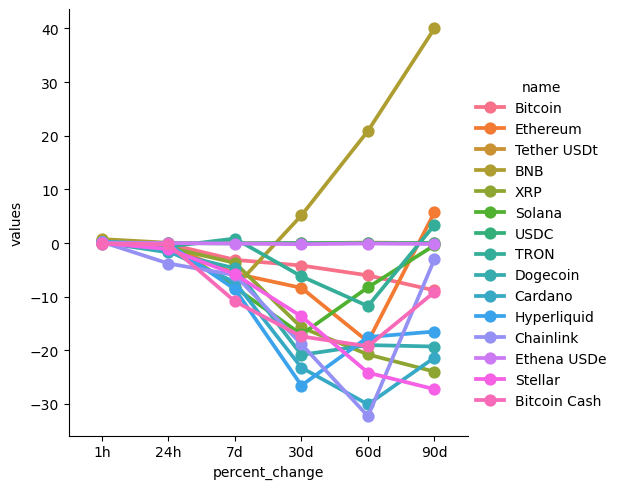

In [29]:
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point')

In [30]:
df7 = df72[['name', 'quote.USD.price', 'timestamp']]
df7 = df7.query("name == 'Bitcoin'")
df7

,name,quote.USD.price,timestamp
0,Bitcoin,122345.71792,2025-10-07 20:56:28.900509
15,Bitcoin,121692.56360,2025-10-08 12:56:46.679044
30,Bitcoin,122838.31776,2025-10-08 17:17:29.702081
45,Bitcoin,122838.31776,2025-10-08 17:18:30.809241
60,Bitcoin,122837.10854,2025-10-08 17:19:31.446267
75,Bitcoin,122837.10854,2025-10-08 17:20:32.710815
90,Bitcoin,122837.10854,2025-10-08 17:21:33.232539
105,Bitcoin,122915.32184,2025-10-08 17:22:34.271205
120,Bitcoin,122915.32184,2025-10-08 17:23:35.381469
135,Bitcoin,122901.48201,2025-10-08 17:24:36.427033


In [31]:
df7['timestamp'] = pd.to_datetime(df7['timestamp'])
df8 = df7.copy()
df8['time'] = df7['timestamp'].dt.strftime('%H:%M')
df8

,name,quote.USD.price,timestamp,time
0,Bitcoin,122345.71792,2025-10-07 20:56:28.900509,20:56
15,Bitcoin,121692.56360,2025-10-08 12:56:46.679044,12:56
30,Bitcoin,122838.31776,2025-10-08 17:17:29.702081,17:17
45,Bitcoin,122838.31776,2025-10-08 17:18:30.809241,17:18
60,Bitcoin,122837.10854,2025-10-08 17:19:31.446267,17:19
75,Bitcoin,122837.10854,2025-10-08 17:20:32.710815,17:20
90,Bitcoin,122837.10854,2025-10-08 17:21:33.232539,17:21
105,Bitcoin,122915.32184,2025-10-08 17:22:34.271205,17:22
120,Bitcoin,122915.32184,2025-10-08 17:23:35.381469,17:23
135,Bitcoin,122901.48201,2025-10-08 17:24:36.427033,17:24


<Axes: xlabel='time', ylabel='quote.USD.price'>

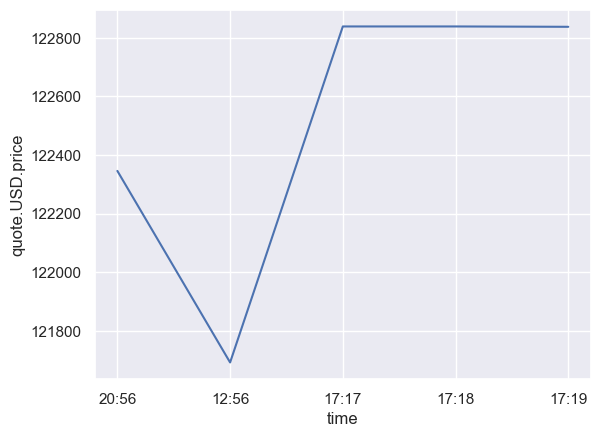

In [32]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='time', y='quote.USD.price', data=df8.head(5))